In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs231n' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'cs231n/assignments/assignment1/cs231n/'
FOLDERNAME = 'CS231N/assignments/assignment1/cs231n/'

assert FOLDERNAME is not None, "[!] Enter the foldername."

'''
создается копия рабочих папок, распаковываюся данные - в все на диске colab
ВАЖНО СОХРАНИТЬ внесенные изменения на google диск. Это ячейка в самом конце
'''
%cd /content/drive/My \Drive
%cp -r $FOLDERNAME ../../
%cd ../../
%cd cs231n/datasets/
!bash get_datasets.sh
%cd ../../


Mounted at /content/drive
/content/drive/My Drive
/content
/content/cs231n/datasets
--2022-02-07 14:02:03--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  52.2MB/s    in 3.1s    

2022-02-07 14:02:06 (52.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
/content


# Implementing a Neural Network
В этом упражнении мы разработаем нейронную сеть с полностью связанными слоями для выполнения классификации и протестируем ее на наборе данных CIFAR-10.

In [52]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Мы будем использовать класс `TwoLayerNet` в файле `cs231n/classifiers/neural_net.py` для представления экземпляров нашей сети. Сетевые параметры хранятся в переменной экземпляра `self.params`, где ключи — это имена строковых параметров, а значения — массивы numpy. Ниже мы инициализируем игрушечные данные и игрушечную модель, которые мы будем использовать для разработки вашей реализации.

In [43]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Откройте файл `cs231n/classifiers/neural_net.py` и посмотрите на метод `TwoLayerNet.loss`. Эта функция очень похожа на функции потерь, которые вы написали для упражнений SVM и Softmax: она берет данные и веса и вычисляет оценки класса, потери и градиенты параметров. Реализуйте первую часть прямого прохода, которая использует веса и смещения для вычисления оценок для всех входных данных.

In [44]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
В той же функции реализуйте вторую часть, которая вычисляет потери данных и регуляризации.

In [45]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Реализуйте остальную часть функции. Это позволит вычислить градиент потерь по отношению к переменным `W1, b1, W2 и b2.` Теперь, когда у вас (надеюсь!) правильно реализован прямой проход, вы можете отладить обратный проход, используя числовую проверку градиента:

In [46]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 1.125423e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 3.865070e-11


# Train the network
Для обучения сети мы будем использовать стохастический градиентный спуск (SGD), аналогичный классификаторам SVM и Softmax. Посмотрите на функцию `TwoLayerNet.train` и заполните недостающие разделы, чтобы реализовать процедуру обучения. Это должно быть очень похоже на процедуру обучения, которую вы использовали для классификаторов SVM и Softmax. Вам также потребуется реализовать `TwoLayerNet.predict`, так как процесс обучения периодически выполняет прогнозирование, чтобы отслеживать точность во времени, пока сеть обучается.

После того, как вы реализовали метод, запустите приведенный ниже код, чтобы обучить двухслойную сеть на игрушечных данных. Вы должны добиться потерь при обучении менее 0.02.

Final training loss:  0.017149607938732044


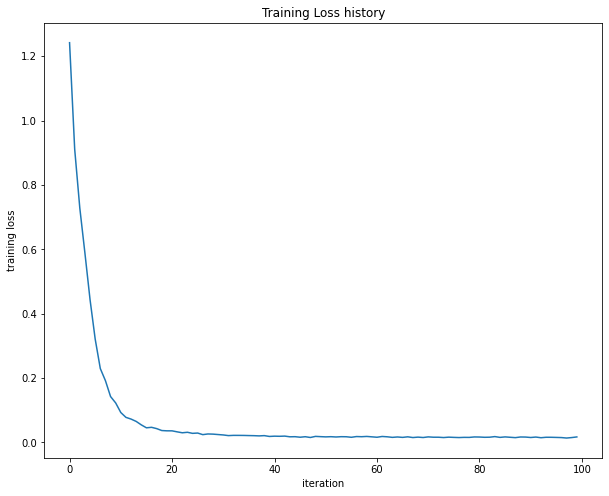

In [47]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Теперь, когда вы реализовали двухслойную сеть, которая проходит проверки градиента и работает с игрушечными данными, пришло время загрузить наши любимые данные CIFAR-10, чтобы мы могли использовать их для обучения классификатора на реальном наборе данных.

In [8]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
Для обучения нашей сети мы будем использовать SGD. Кроме того, мы будем корректировать скорость обучения с экспоненциальным графиком скорости обучения по мере продолжения оптимизации; после каждой эпохи мы будем уменьшать скорость обучения, умножая ее на скорость затухания.

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
С параметрами по умолчанию, которые мы предоставили выше, вы должны получить точность проверки около 0,29 в наборе проверки. это не очень хорошо

Одна из стратегий для понимания того, что не так, состоит в том, чтобы построить график функции потерь и точности на обучающих и проверочных наборах во время оптимизации.

Другая стратегия состоит в том, чтобы визуализировать веса, полученные на первом уровне сети. В большинстве нейронных сетей, обученных на визуальных данных, веса первого слоя обычно показывают некоторую видимую структуру при визуализации.

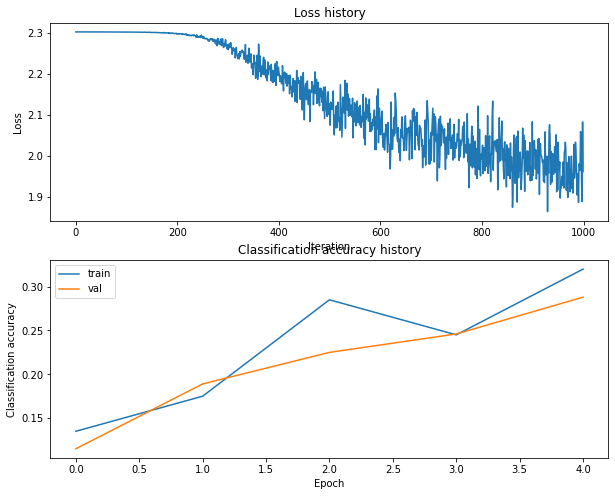

In [11]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

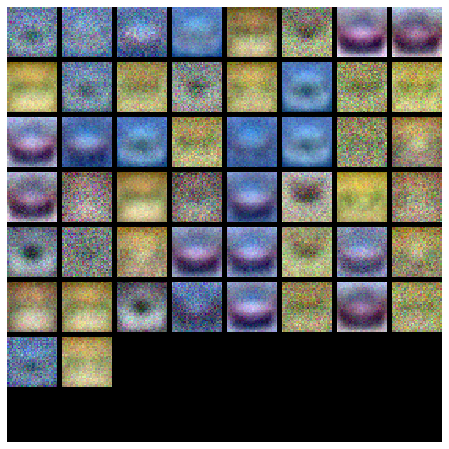

In [12]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Глядя на визуализации выше, мы видим, что потери уменьшаются более или менее линейно, что, по-видимому, предполагает, что скорость обучения может быть слишком низкой. Более того, между точностью обучения и проверки нет разрыва, что говорит о том, что используемая нами модель имеет низкую пропускную способность (capacity) и что нам следует увеличить ее размер. С другой стороны, с очень большой моделью мы ожидаем увидеть больше переобучения, что проявит себя как очень большой разрыв между точностью обучения и проверки.

**Tuning**. Настройка гиперпараметров и понимание того, как они влияют на конечную эффективность — важная часть использования нейронных сетей, поэтому мы хотим, чтобы вы много практиковались. Ниже вы должны поэкспериментировать с различными значениями различных гиперпараметров, включая размер скрытого слоя, скорость обучения, количество эпох обучения и силу регуляризации. Вы также можете рассмотреть возможность настройки снижения скорости обучения, но вы должны иметь возможность получить хорошую эффективность, используя значение по умолчанию.

**Approximate results**. Вы должны стремиться к достижению точности классификации выше 48% на проверочном (validation) наборе. Наша лучшая сеть набрала более 52 % в проверочном наборе.

**Experiment**: Ваша цель в этом упражнении — получить как можно более хороший результат на CIFAR-10 (52% могут служить эталоном) с полносвязной нейронной сетью. Не стесняйтесь реализовывать свои собственные методы (например, `PCA` для уменьшения размерности, добавления `dropout` или добавления `features` в `решатель (solver)` и т. д.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [136]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

best_val = -1
best_net_history = None
results ={}
'''
Оценка эффективности модели при опредленных гиперпараметрах будет производиться 
на определенном заданном заренее наборе ( 1000 шт без кросс валидации)
'''
'''hidden_layers_sizes = [55, 65, 75, 85]
learning_rates = [1e-5,1e-4,1e-3, 1e-2]
regularization_strengths = [1e-3,0.01,0.1,1]'''
hidden_layers_sizes = [60,70,80,90]
learning_rates = [1e-3, 1e-4,1e-5]
regularization_strengths = [1e-2,1e-3,0.25]

grid = [(lsz,lr,rg) for lsz in hidden_layers_sizes for lr in learning_rates for rg in regularization_strengths ]
print("Кол-во итераций по параметрам ", len(grid))
i = 0
j = 0
for lsz,lr,rg in grid:
  i+=1
  if i % 10 == 0 :
    print("Выполняется %d/ %d итераций " % (i,len(grid)))
  net = TwoLayerNet(32*32*3,lsz,10)
  result_train = net.train(X_train, y_train, X_val, y_val, learning_rate = lr, reg = rg, num_iters = 1470, batch_size = 200)
  val_acc_history = result_train["val_acc_history"]
  if(best_val < max(val_acc_history)):
    best_val = max(val_acc_history)
    best_net = net
    best_net_history = result_train
  
  results[(lsz,lr,rg)] = [result_train["train_acc_history"][np.argmax(val_acc_history)],max(val_acc_history)]

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


Кол-во итераций по параметрам  36
Выполняется 10/ 36 итераций 
Выполняется 20/ 36 итераций 
Выполняется 30/ 36 итераций 


In [137]:
for key, value in sorted(results.items(), key= lambda val_acc : np.asarray(val_acc)[1][1], reverse = True):
    train_accuracy, val_accuracy = results[key]
    print('lsz %d lr %e reg %e train accuracy: %f val accuracy: %f' % (
                key[0], key[1], key[2], value[0], value[1]))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lsz 90 lr 1.000000e-03 reg 1.000000e-02 train accuracy: 0.650000 val accuracy: 0.501000
lsz 90 lr 1.000000e-03 reg 1.000000e-03 train accuracy: 0.505000 val accuracy: 0.494000
lsz 70 lr 1.000000e-03 reg 1.000000e-02 train accuracy: 0.575000 val accuracy: 0.492000
lsz 80 lr 1.000000e-03 reg 1.000000e-03 train accuracy: 0.575000 val accuracy: 0.490000
lsz 90 lr 1.000000e-03 reg 2.500000e-01 train accuracy: 0.550000 val accuracy: 0.489000
lsz 80 lr 1.000000e-03 reg 1.000000e-02 train accuracy: 0.680000 val accuracy: 0.488000
lsz 70 lr 1.000000e-03 reg 1.000000e-03 train accuracy: 0.540000 val accuracy: 0.482000
lsz 80 lr 1.000000e-03 reg 2.500000e-01 train accuracy: 0.570000 val accuracy: 0.482000
lsz 60 lr 1.000000e-03 reg 1.000000e-03 train accuracy: 0.645000 val accuracy: 0.481000
lsz 60 lr 1.000000e-03 reg 2.500000e-01 train accuracy: 0.595000 val accuracy: 0.481000
lsz 60 lr 1.000000e-03 reg 1.000000e-02 train accuracy: 0.535000 val accuracy: 0.478000
lsz 70 lr 1.000000e-03 reg 2.500

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [138]:
stats = best_net_history

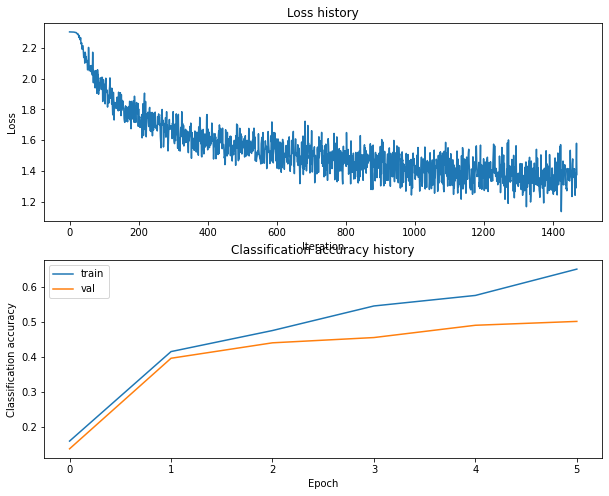

In [139]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

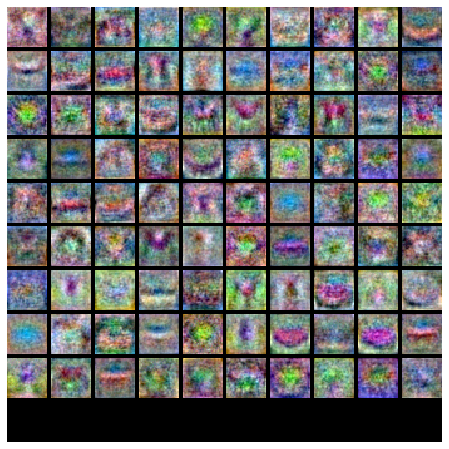

In [140]:
show_net_weights(best_net)

In [141]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.486


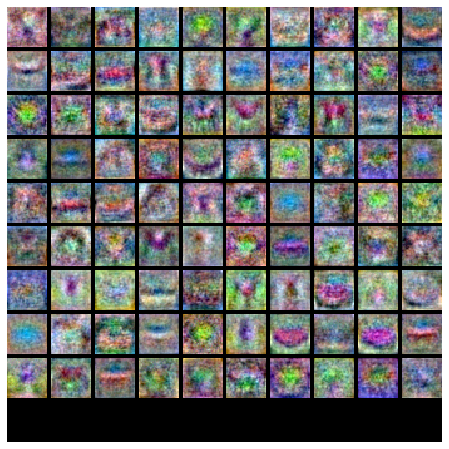

In [142]:
# Visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
Когда вы закончите экспериментировать, вы должны оценить свою окончательную обученную сеть на тестовом наборе; вы должны получить выше 48%.

In [143]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.5


**Inline Question**

Теперь, когда вы обучили классификатор нейронной сети, вы можете обнаружить, что точность вашего тестирования намного ниже, чем точность обучения. Каким образом мы можем уменьшить этот разрыв? Выбрать все, что подходит.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$



---
# IMPORTANT

This is the end of this question. Please do the following:

1. Click `File -> Save` to make sure the latest checkpoint of this notebook is saved to your Drive.
2. Execute the cell below to download the modified `.py` files back to your drive.

In [144]:
import os

FOLDER_TO_SAVE = os.path.join('drive/My Drive/', FOLDERNAME)
FILES_TO_SAVE = ['cs231n/classifiers/neural_net.py']

for files in FILES_TO_SAVE:
  with open(os.path.join(FOLDER_TO_SAVE, '/'.join(files.split('/')[1:])), 'w') as f:
    f.write(''.join(open(files).readlines()))